In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [25]:
df = pd.read_csv(r"D:\Datasets\honeyproduction.csv")

In [26]:
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB
None


In [28]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

In [29]:
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [63]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)

In [64]:
 Y = prod_per_year['totalprod']

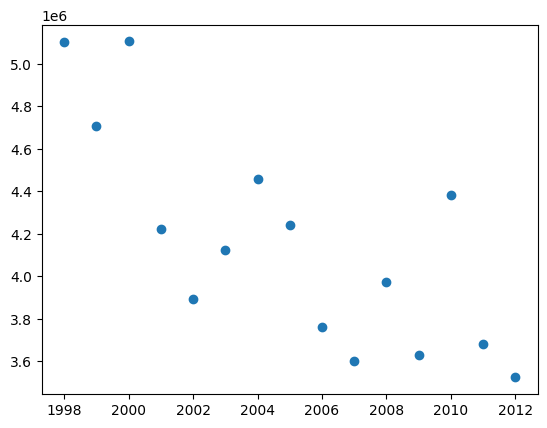

In [32]:
plt.scatter(X,Y)
plt.show()


In [33]:
regression_model = linear_model.LinearRegression()

In [34]:
regression_model.fit(X, Y)

LinearRegression()

In [35]:
print(regression_model.coef_)


[-88303.18915238]


In [36]:
print(regression_model.intercept_)

181208083.10732976


In [37]:
y_predict = regression_model.predict(X)

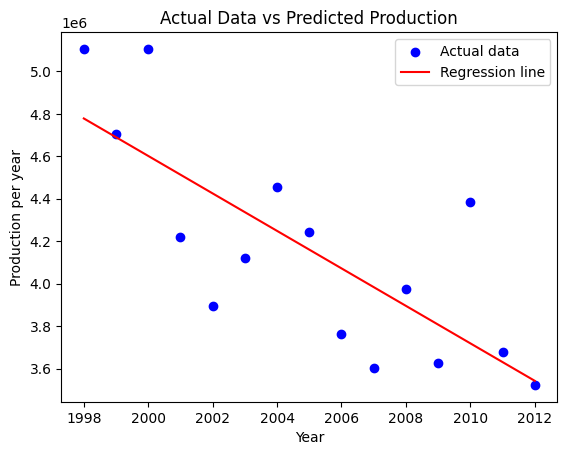

In [61]:
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, y_predict, color='red', label='Regression line')

plt.xlabel('Year')
plt.ylabel('Production per year')
plt.title('Actual Data vs Predicted Production')
plt.legend()
plt.show()

In [52]:
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)


In [53]:
X_predict = regression_model.predict(X_future)

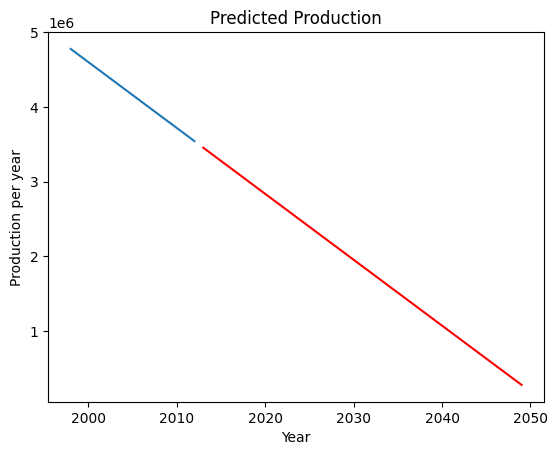

In [62]:
plt.plot(X, y_predict)
plt.plot(X_future, X_predict, color='red')
plt.xlabel('Year')
plt.ylabel('Production per year')
plt.title('Predicted Production')

plt.show()